In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research for INK


In [10]:
prices_day__2 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_-2.csv",sep = ";")
prices_day__2 = prices_day__2[prices_day__2["product"] == "SQUID_INK"]
prices_day__1 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_-1.csv",sep = ";")
prices_day__1 = prices_day__1[prices_day__1["product"] == "SQUID_INK"]
prices_day_0 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_0.csv",sep = ";")
prices_day_0 = prices_day_0[prices_day_0["product"] == "SQUID_INK"]

In [ ]:

all_prices = pd.concat([prices_day__2, prices_day__1, prices_day_0])

In [39]:
all_prices["mid_price"] = (all_prices["bid_price_1"] + all_prices["ask_price_1"]) / 2


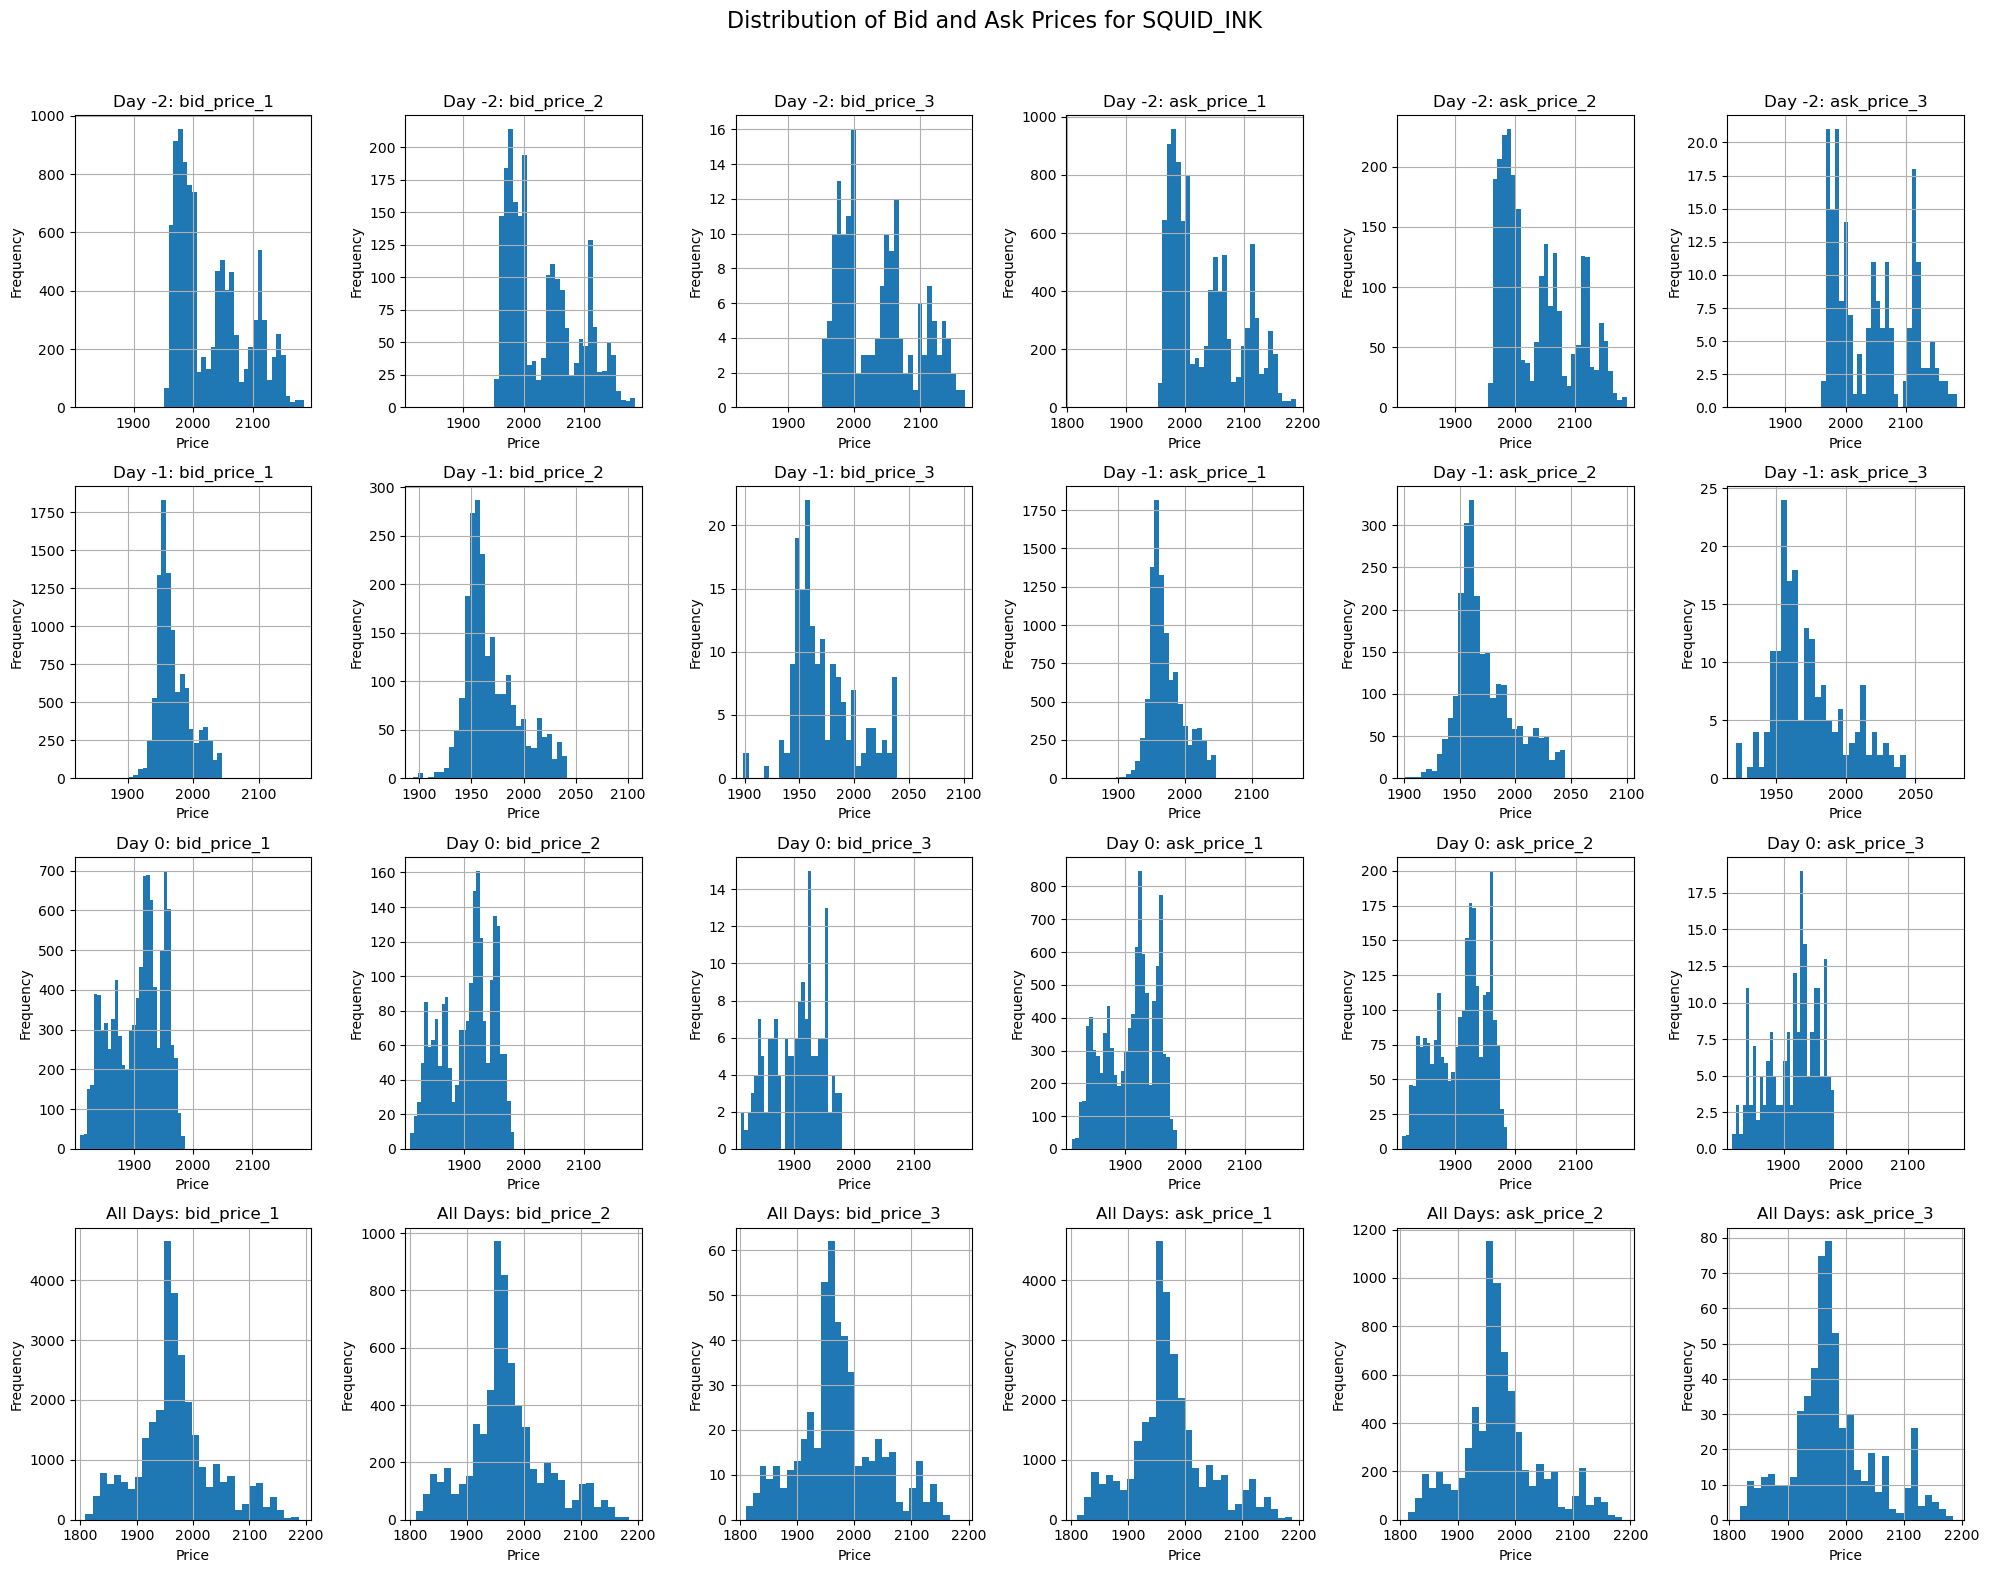

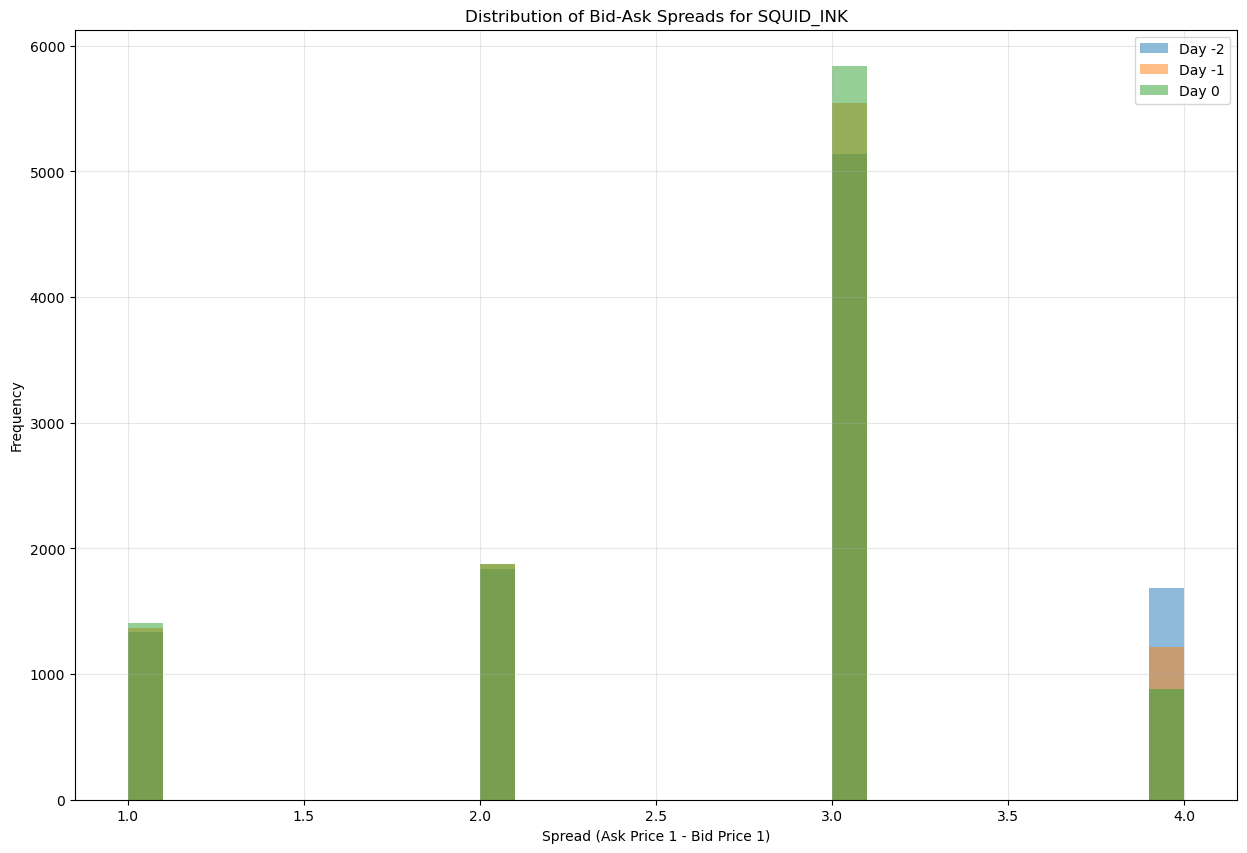

In [34]:

# Define the columns to plot
bid_columns = ['bid_price_1', 'bid_price_2', 'bid_price_3']
ask_columns = ['ask_price_1', 'ask_price_2', 'ask_price_3']
all_columns = bid_columns + ask_columns

# Create a 4x6 grid of subplots (4 datasets x 6 price columns)
fig, axes = plt.subplots(4, 6, figsize=(20, 16))
fig.suptitle('Distribution of Bid and Ask Prices for SQUID_INK', fontsize=16)

# Plot for day -2
for i, col in enumerate(all_columns):
    if col in prices_day__2.columns:
        prices_day__2[col].dropna().hist(ax=axes[0, i], bins=30)
        axes[0, i].set_title(f'Day -2: {col}')
        axes[0, i].set_xlabel('Price')
        axes[0, i].set_ylabel('Frequency')
        # Center x-axis at 2000
        x_min, x_max = axes[0, i].get_xlim()
        margin = max(abs(2000 - x_min), abs(2000 - x_max))
        axes[0, i].set_xlim(2000 - margin, 2000 + margin)

# Plot for day -1
for i, col in enumerate(all_columns):
    if col in prices_day__1.columns:
        prices_day__1[col].dropna().hist(ax=axes[1, i], bins=30)
        axes[1, i].set_title(f'Day -1: {col}')
        axes[1, i].set_xlabel('Price')
        axes[1, i].set_ylabel('Frequency')
        # Center x-axis at 2000
        x_min, x_max = axes[1, i].get_xlim()
        margin = max(abs(2000 - x_min), abs(2000 - x_max))
        axes[1, i].set_xlim(2000 - margin, 2000 + margin)

# Plot for day 0
for i, col in enumerate(all_columns):
    if col in prices_day_0.columns:
        prices_day_0[col].dropna().hist(ax=axes[2, i], bins=30)
        axes[2, i].set_title(f'Day 0: {col}')
        axes[2, i].set_xlabel('Price')
        axes[2, i].set_ylabel('Frequency')
        # Center x-axis at 2000
        x_min, x_max = axes[2, i].get_xlim()
        margin = max(abs(2000 - x_min), abs(2000 - x_max))
        axes[2, i].set_xlim(2000 - margin, 2000 + margin)

# Plot for all days combined
for i, col in enumerate(all_columns):
    if col in all_prices.columns:
        all_prices[col].dropna().hist(ax=axes[3, i], bins=30)
        axes[3, i].set_title(f'All Days: {col}')
        axes[3, i].set_xlabel('Price')
        axes[3, i].set_ylabel('Frequency')
        # Center x-axis at 2000
        x_min, x_max = axes[3, i].get_xlim()
        margin = max(abs(2000 - x_min), abs(2000 - x_max))
        axes[3, i].set_xlim(2000 - margin, 2000 + margin)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create a second figure to compare bid-ask spreads
plt.figure(figsize=(15, 10))

# Calculate best bid-ask spread for each day
for df, day in [(prices_day__2, '-2'), (prices_day__1, '-1'), (prices_day_0, '0')]:
    best_bid = df['bid_price_1'].dropna()
    best_ask = df['ask_price_1'].dropna()
    
    # Only calculate spread where both bid and ask exist
    valid_indices = best_bid.index.intersection(best_ask.index)
    if len(valid_indices) > 0:
        spread = df.loc[valid_indices, 'ask_price_1'] - df.loc[valid_indices, 'bid_price_1']
        plt.hist(spread, bins=30, alpha=0.5, label=f'Day {day}')

plt.title('Distribution of Bid-Ask Spreads for SQUID_INK')
plt.xlabel('Spread (Ask Price 1 - Bid Price 1)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
# Do not center x-axis
plt.show()


In [27]:
value_count_best_ask = dict(all_prices["ask_price_1"].value_counts())

In [28]:
# Filter for ask prices that appear more than 200 times
{price: count for price, count in value_count_best_ask.items() if count > 200}

{1958: np.int64(468),
 1960: np.int64(459),
 1959: np.int64(424),
 1957: np.int64(415),
 1955: np.int64(364),
 1961: np.int64(363),
 1962: np.int64(348),
 1956: np.int64(344),
 1964: np.int64(342),
 1973: np.int64(339),
 1963: np.int64(338),
 1970: np.int64(335),
 1972: np.int64(334),
 1965: np.int64(323),
 1954: np.int64(308),
 1969: np.int64(308),
 1953: np.int64(307),
 1971: np.int64(302),
 1966: np.int64(301),
 1950: np.int64(299),
 1968: np.int64(298),
 1967: np.int64(290),
 1974: np.int64(286),
 1952: np.int64(275),
 1951: np.int64(270),
 1949: np.int64(264),
 1975: np.int64(250),
 1984: np.int64(238),
 1948: np.int64(230),
 1980: np.int64(229),
 1988: np.int64(227),
 1982: np.int64(227),
 1989: np.int64(219),
 1983: np.int64(214),
 1987: np.int64(214),
 1986: np.int64(211),
 1976: np.int64(203),
 1977: np.int64(202),
 1985: np.int64(201)}

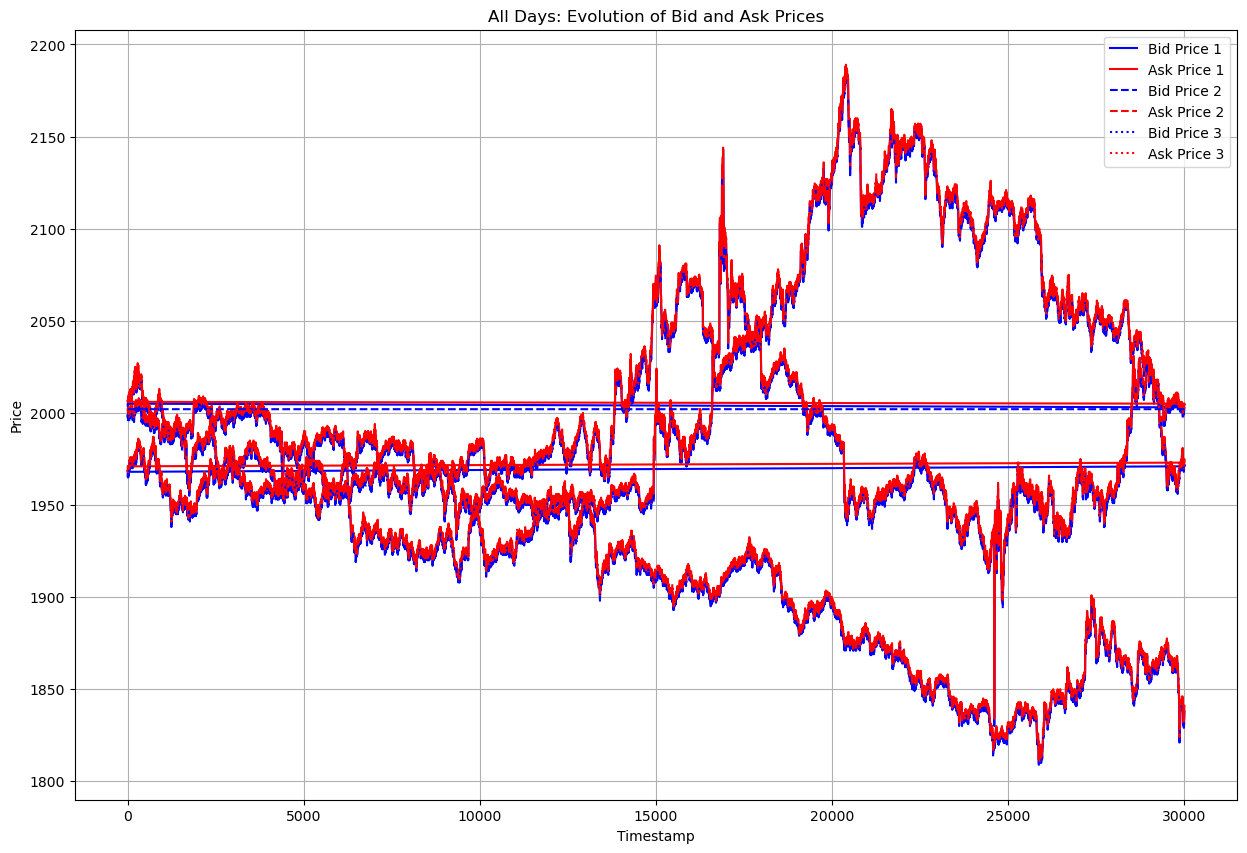

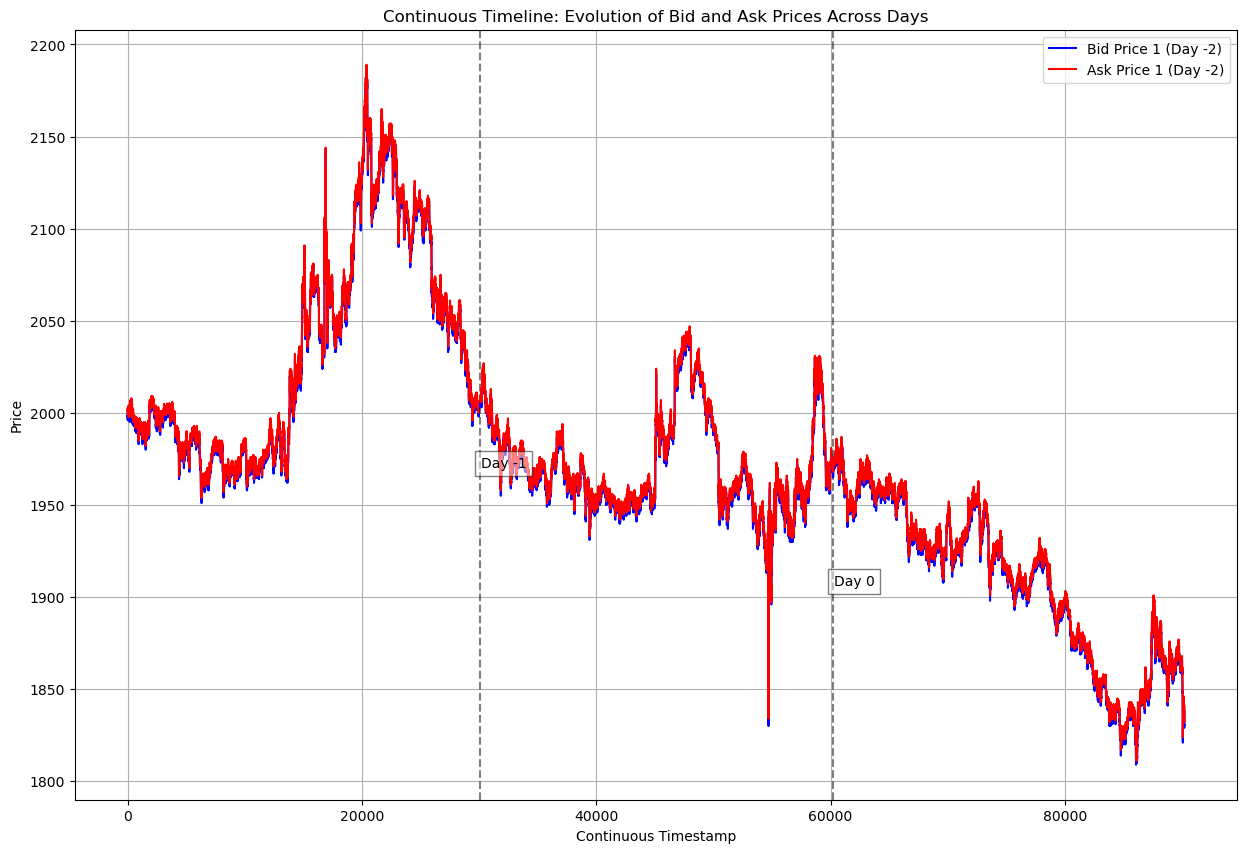

In [20]:
# Plot evolution of prices for all days combined
plt.figure(figsize=(15, 10))

# All days combined
if 'bid_price_1' in all_prices.columns and 'ask_price_1' in all_prices.columns:
    plt.plot(all_prices.index, all_prices['bid_price_1'], 'b-', label='Bid Price 1')
    plt.plot(all_prices.index, all_prices['ask_price_1'], 'r-', label='Ask Price 1')
    if 'bid_price_2' in all_prices.columns and 'ask_price_2' in all_prices.columns:
        plt.plot(all_prices.index, all_prices['bid_price_2'], 'b--', label='Bid Price 2')
        plt.plot(all_prices.index, all_prices['ask_price_2'], 'r--', label='Ask Price 2')
    if 'bid_price_3' in all_prices.columns and 'ask_price_3' in all_prices.columns:
        plt.plot(all_prices.index, all_prices['bid_price_3'], 'b:', label='Bid Price 3')
        plt.plot(all_prices.index, all_prices['ask_price_3'], 'r:', label='Ask Price 3')
    plt.title('All Days: Evolution of Bid and Ask Prices')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
plt.show()

# Create a continuous timeline plot where days follow each other
plt.figure(figsize=(15, 10))

# Create a new dataframe with continuous timestamps
continuous_data = pd.DataFrame()
timestamp_offset = 0

# Process each day's data in sequence
for day, day_data in [(-2, prices_day__2), (-1, prices_day__1), (0, prices_day_0)]:
    # Create a copy of the data with adjusted timestamps
    day_copy = day_data.copy()
    day_copy.index = day_copy.index + timestamp_offset
    
    # Add a day marker
    if timestamp_offset > 0:
        plt.axvline(x=timestamp_offset, color='k', linestyle='--', alpha=0.5)
        plt.text(timestamp_offset + 50, day_data['bid_price_1'].mean(), f'Day {day}', 
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Plot this day's data
    if 'bid_price_1' in day_copy.columns and 'ask_price_1' in day_copy.columns:
        plt.plot(day_copy.index, day_copy['bid_price_1'], 'b-', label=f'Bid Price 1 (Day {day})' if timestamp_offset == 0 else "")
        plt.plot(day_copy.index, day_copy['ask_price_1'], 'r-', label=f'Ask Price 1 (Day {day})' if timestamp_offset == 0 else "")
    
    # Update the offset for the next day
    timestamp_offset = max(day_copy.index) + 100  # Add a gap between days

plt.title('Continuous Timeline: Evolution of Bid and Ask Prices Across Days')
plt.legend()
plt.grid(True)
plt.xlabel('Continuous Timestamp')
plt.ylabel('Price')
plt.show()


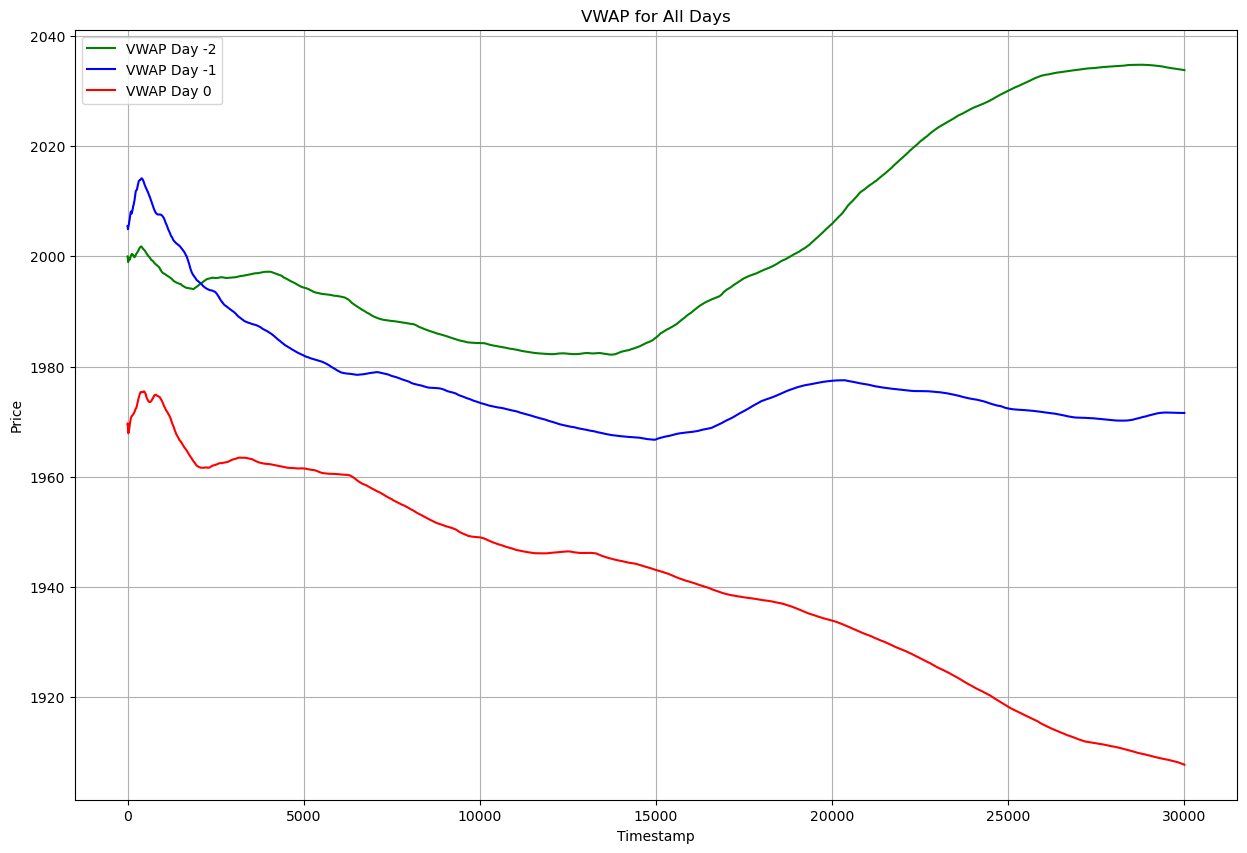

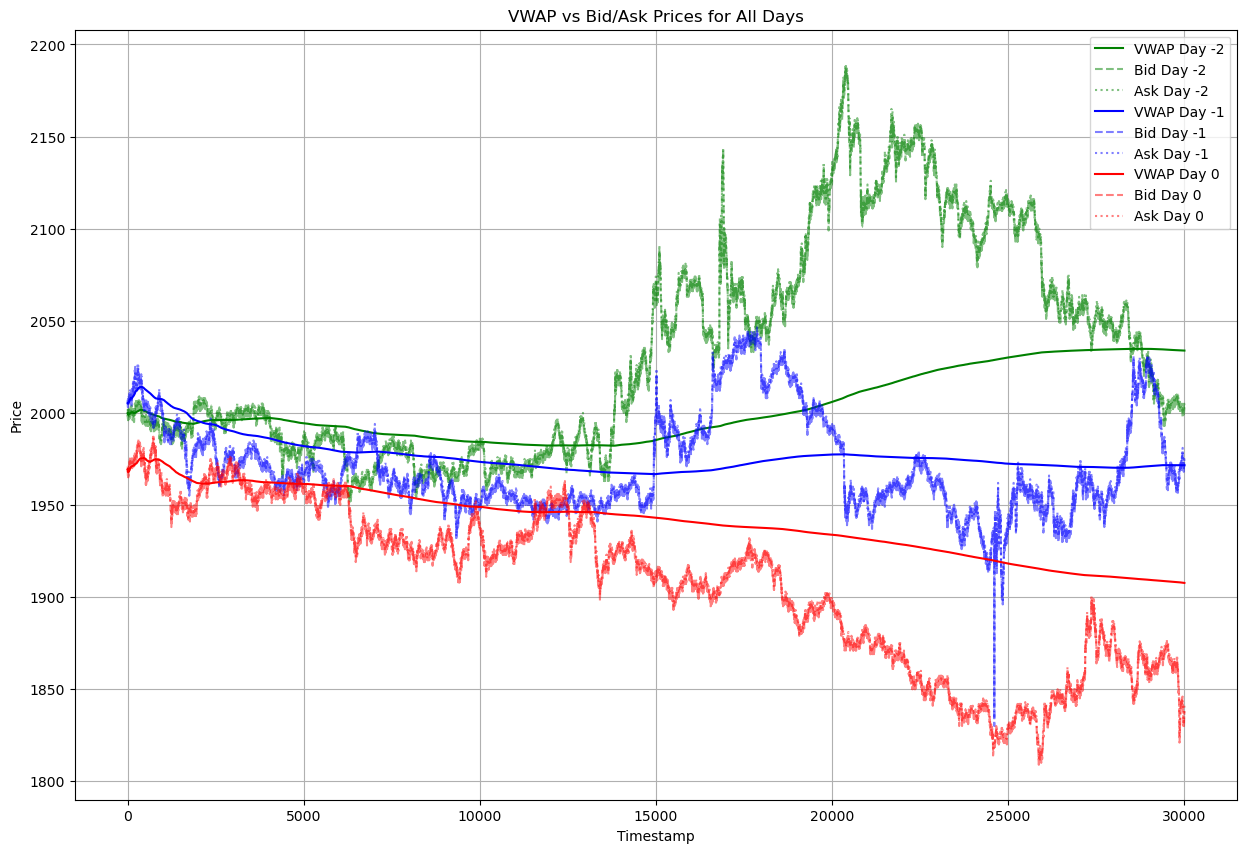

In [31]:
# Calculate VWAP for each day
def calculate_vwap(df):
    # Check if we have bid and ask volume columns
    if ('bid_volume_1' in df.columns and 'ask_volume_1' in df.columns and 
        'bid_price_1' in df.columns and 'ask_price_1' in df.columns):
        # Calculate mid price
        df['mid_price'] = (df['bid_price_1'] + df['ask_price_1']) / 2
        
        # Calculate total volume (sum of bid and ask volumes)
        df['total_volume'] = df['bid_volume_1'] + df['ask_volume_1']
        
        # Calculate VWAP using mid price and total volume
        df['vwap'] = (df['mid_price'] * df['total_volume']).cumsum() / df['total_volume'].cumsum()
    else:
        # Fallback if we don't have the expected columns
        print("Required volume or price columns not found")
        df['vwap'] = df['mid_price'] if 'mid_price' in df.columns else None
    
    return df

# Calculate VWAP for each day
prices_day__2 = calculate_vwap(prices_day__2)
prices_day__1 = calculate_vwap(prices_day__1)
prices_day_0 = calculate_vwap(prices_day_0)

# Plot VWAP for all days
plt.figure(figsize=(15, 10))

# Plot VWAP for day -2
plt.plot(prices_day__2.index, prices_day__2['vwap'], 'g-', label='VWAP Day -2')

# Plot VWAP for day -1
plt.plot(prices_day__1.index, prices_day__1['vwap'], 'b-', label='VWAP Day -1')

# Plot VWAP for day 0
plt.plot(prices_day_0.index, prices_day_0['vwap'], 'r-', label='VWAP Day 0')

plt.title('VWAP for All Days')
plt.legend()
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()

# Plot VWAP with bid/ask prices for comparison
plt.figure(figsize=(15, 10))
for day, day_data, color, label in [
    (-2, prices_day__2, 'g', 'Day -2'),
    (-1, prices_day__1, 'b', 'Day -1'),
    (0, prices_day_0, 'r', 'Day 0')
]:
    plt.plot(day_data.index, day_data['vwap'], f'{color}-', label=f'VWAP {label}')
    plt.plot(day_data.index, day_data['bid_price_1'], f'{color}--', alpha=0.5, label=f'Bid {label}')
    plt.plot(day_data.index, day_data['ask_price_1'], f'{color}:', alpha=0.5, label=f'Ask {label}')

plt.title('VWAP vs Bid/Ask Prices for All Days')
plt.legend()
plt.grid(True)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.show()

Fitting GARCH models for Day -2


c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008944. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH Model Summary for Bid Price (Day -2)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            bid_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10298.5
Distribution:                  Normal   AIC:                          -20588.9
Method:            Maximum Likelihood   BIC:                          -20560.1
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:25   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3

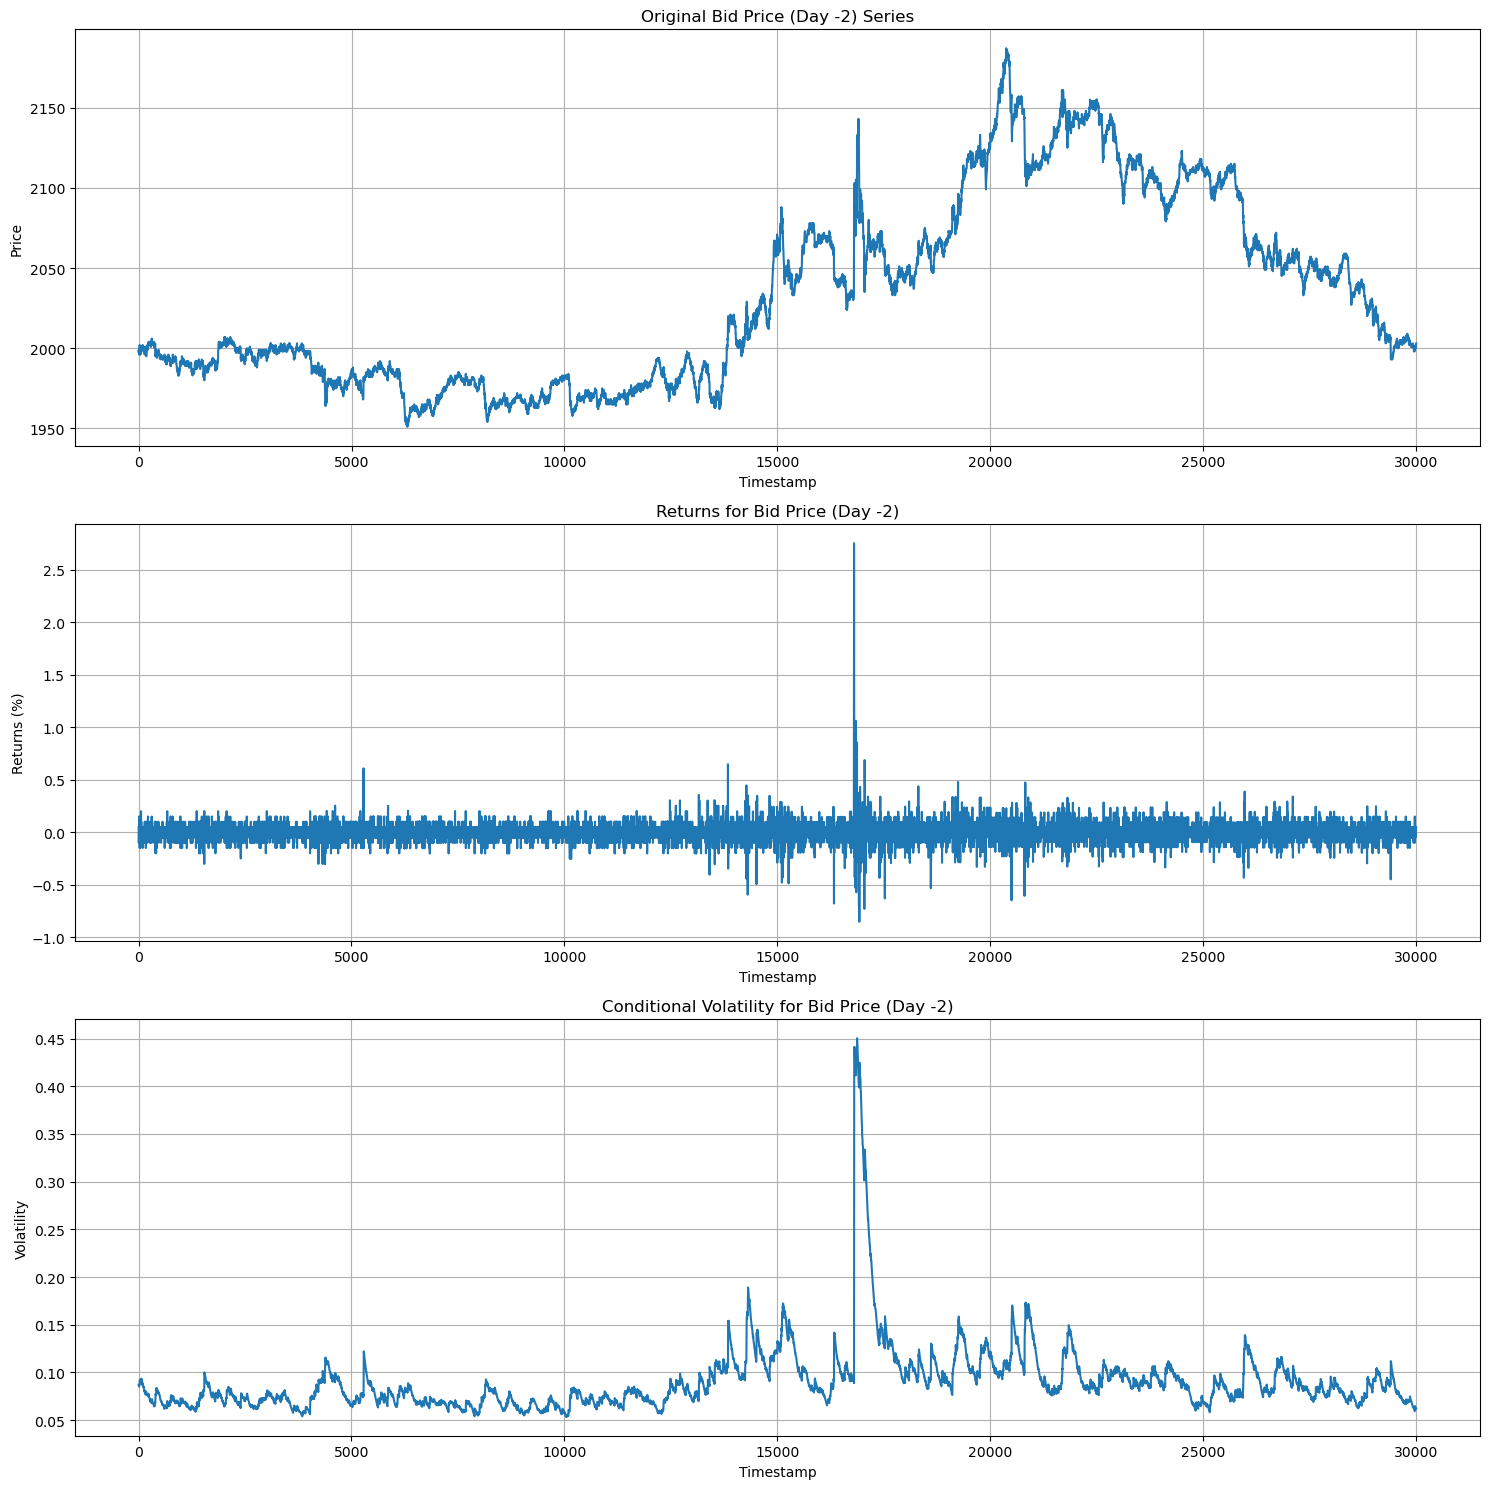

c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009339. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH Model Summary for Ask Price (Day -2)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            ask_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9877.17
Distribution:                  Normal   AIC:                          -19746.3
Method:            Maximum Likelihood   BIC:                          -19717.5
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:28   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1

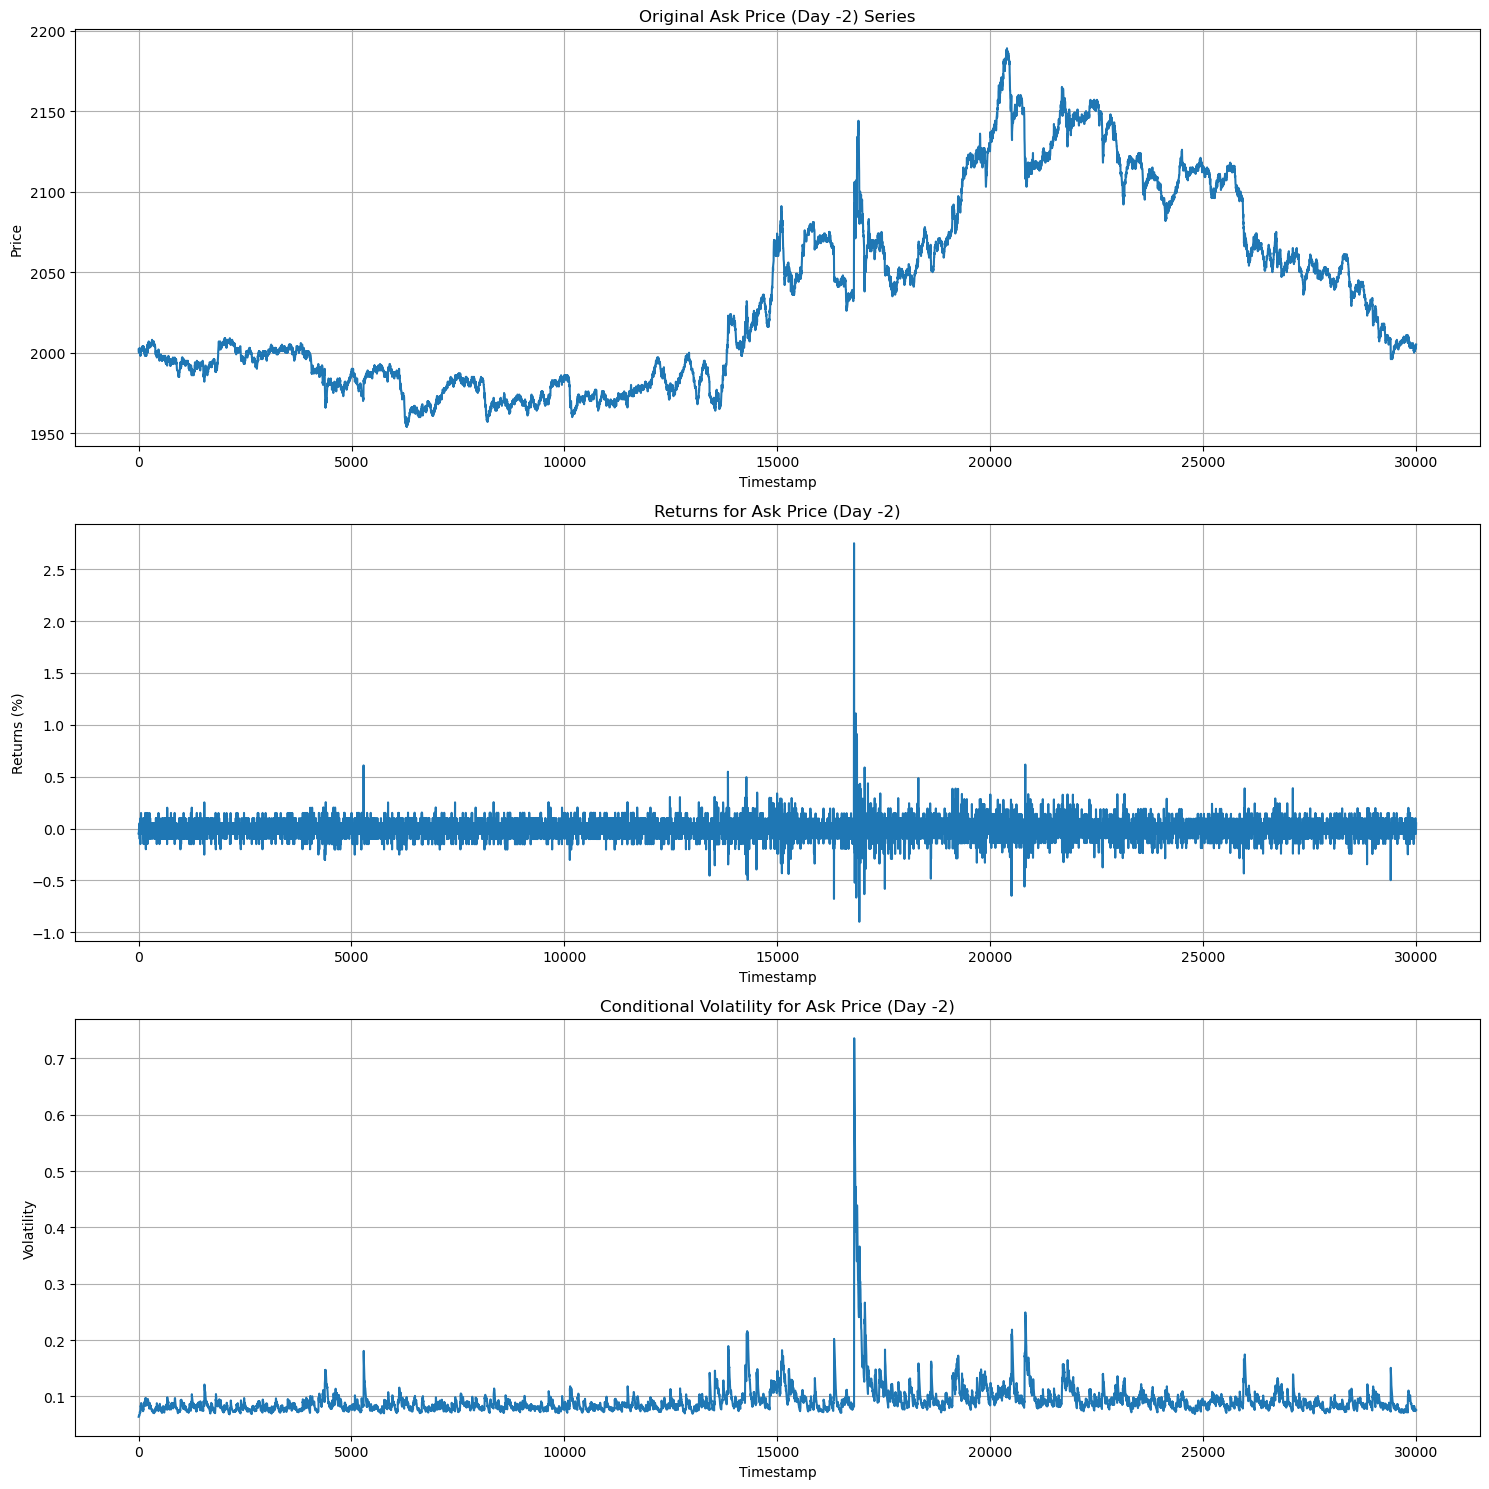

Fitting GARCH models for Day -1


c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01294. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH Model Summary for Bid Price (Day -1)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            bid_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8889.00
Distribution:                  Normal   AIC:                          -17770.0
Method:            Maximum Likelihood   BIC:                          -17741.2
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:30   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu       

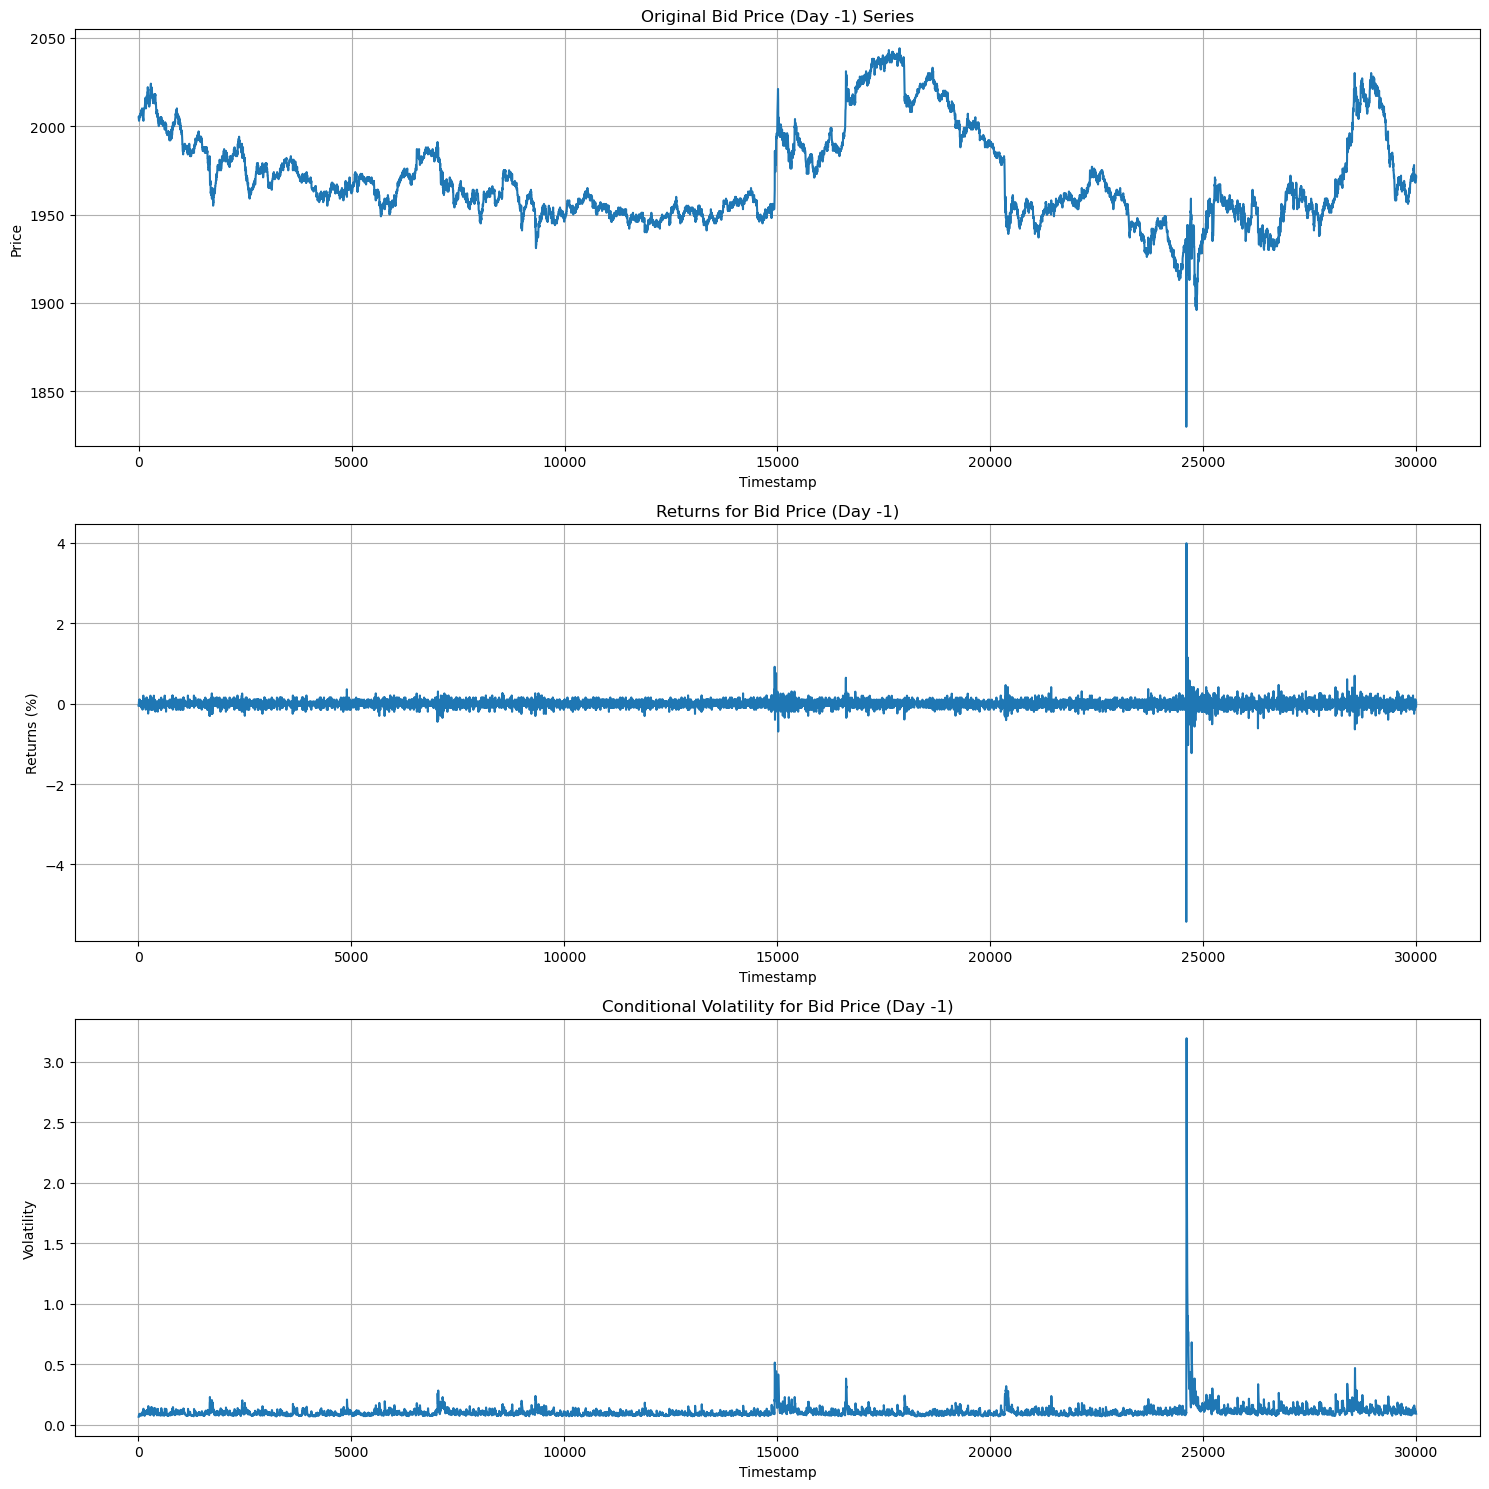

c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH Model Summary for Ask Price (Day -1)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            ask_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8664.68
Distribution:                  Normal   AIC:                          -17321.4
Method:            Maximum Likelihood   BIC:                          -17292.5
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:31   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu       

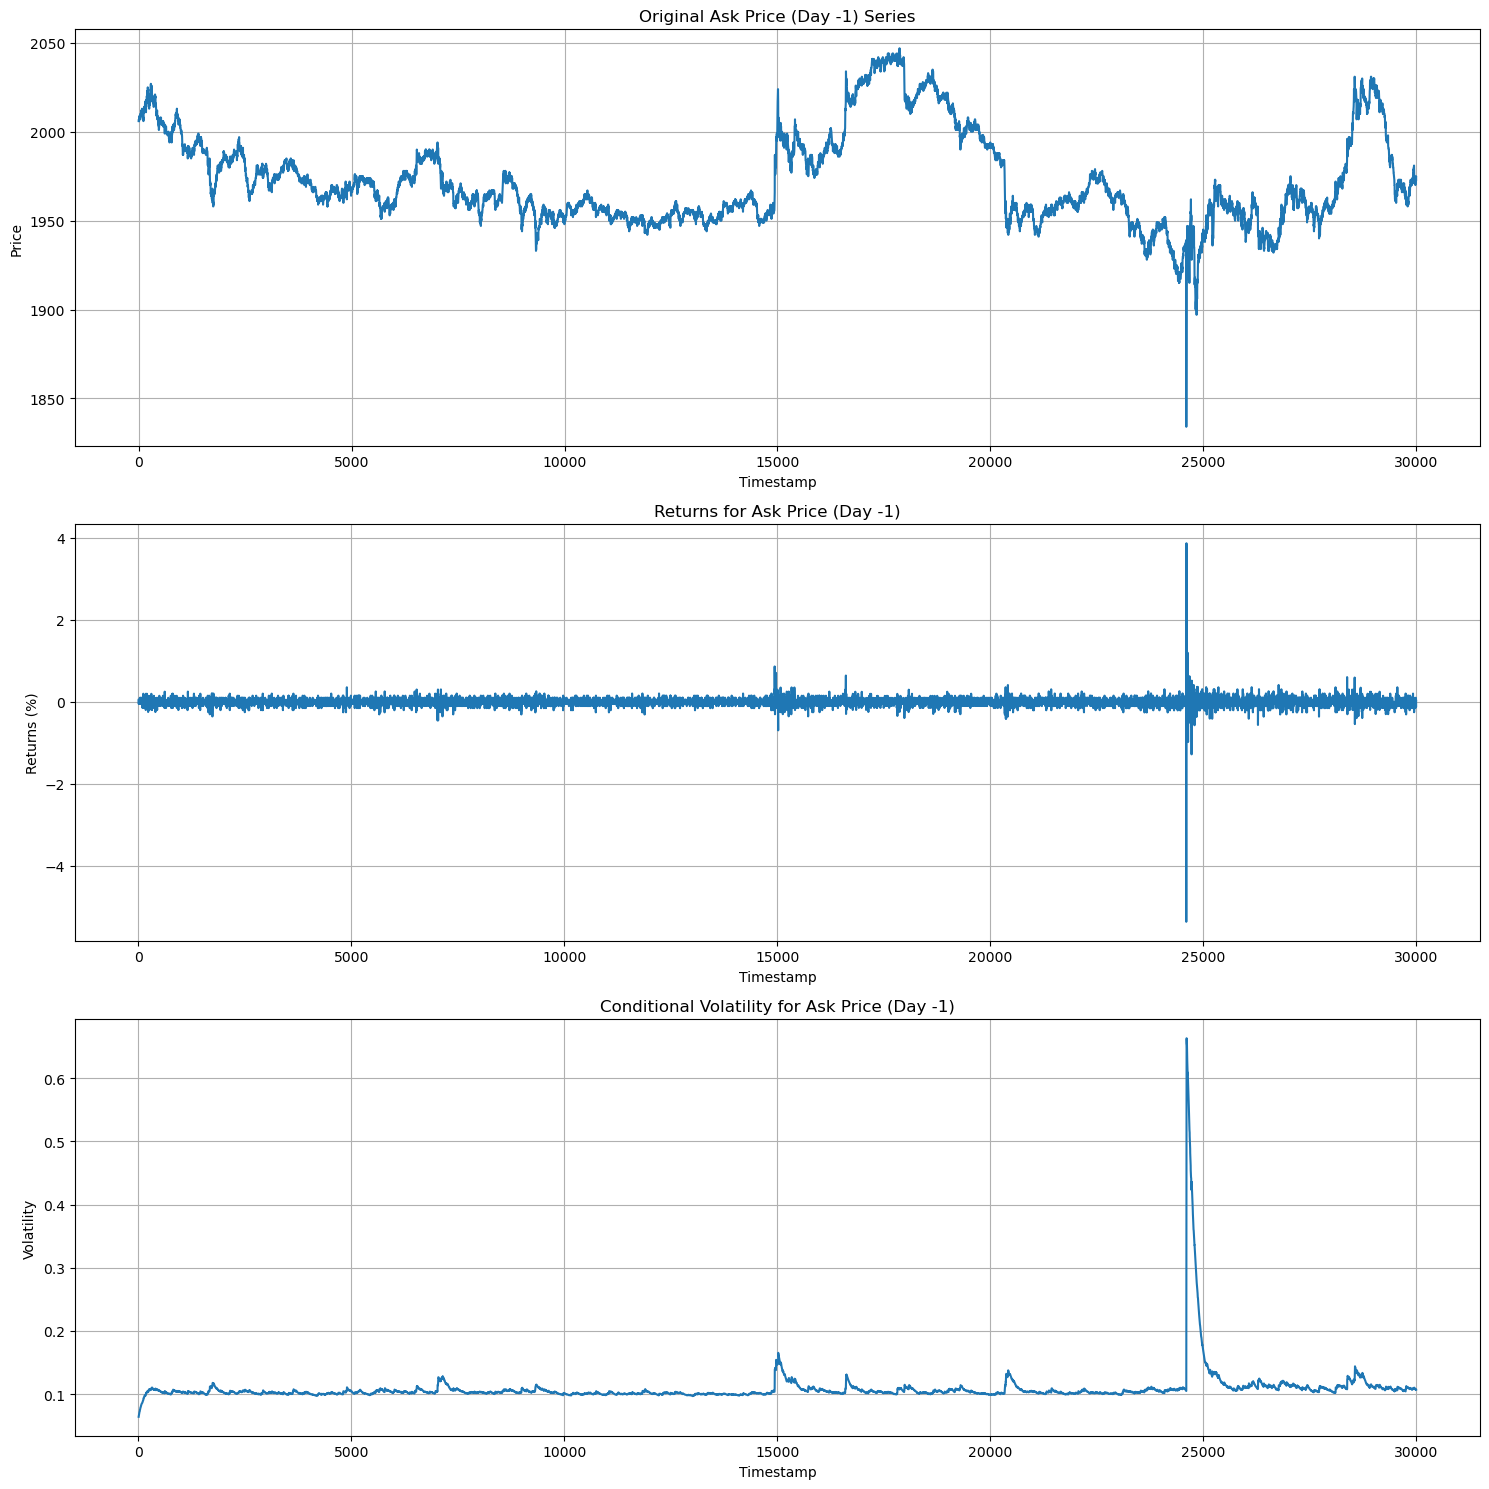

Fitting GARCH models for Day 0
GARCH Model Summary for Bid Price (Day 0)


c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005475. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            bid_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                12139.4
Distribution:                  Normal   AIC:                          -24270.8
Method:            Maximum Likelihood   BIC:                          -24242.0
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:33   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.5178e-05  6.456e-04 -2.351e-02      0.

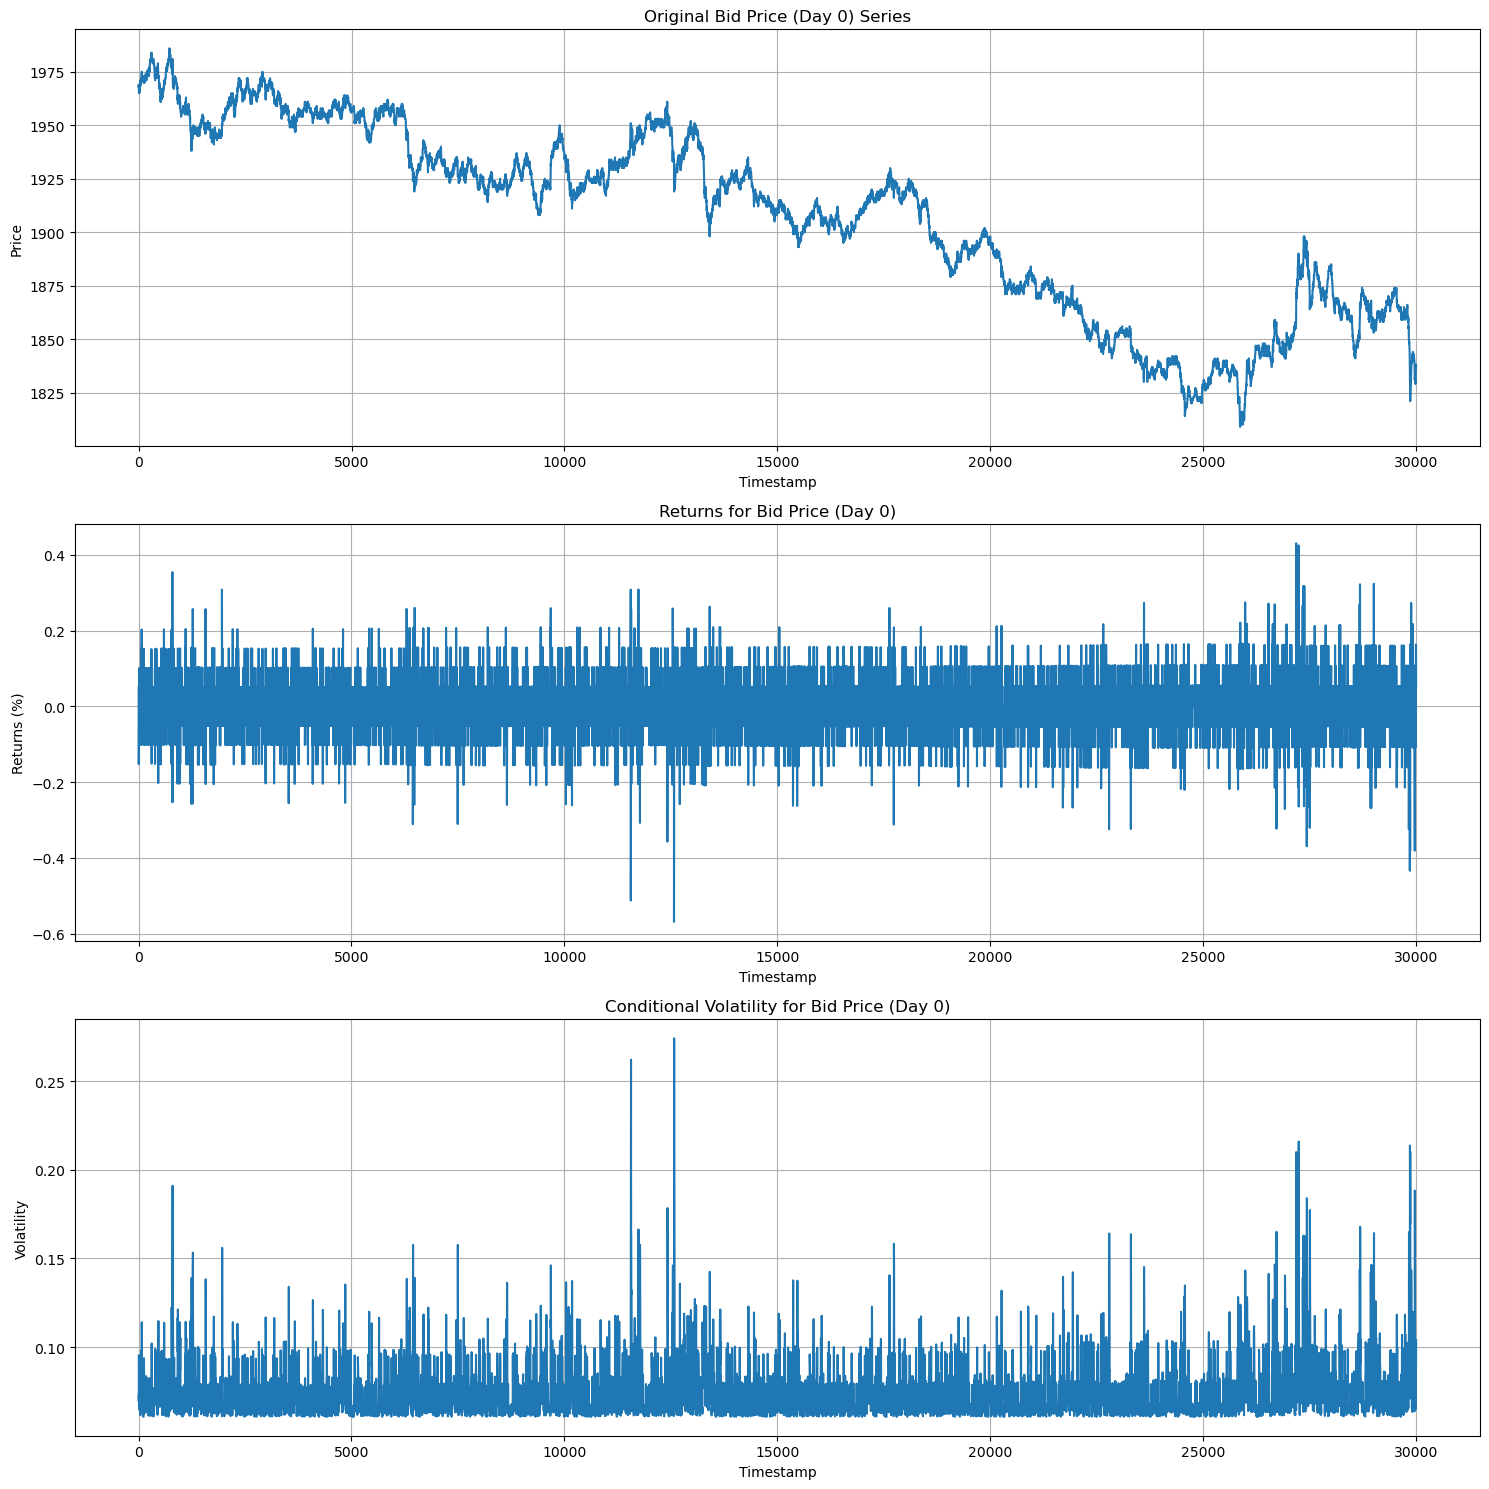

c:\Users\Usuario1\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005867. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH Model Summary for Ask Price (Day 0)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            ask_price_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                11755.3
Distribution:                  Normal   AIC:                          -23502.5
Method:            Maximum Likelihood   BIC:                          -23473.7
                                        No. Observations:                 9999
Date:                Mon, Apr 07 2025   Df Residuals:                     9998
Time:                        13:53:35   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu        

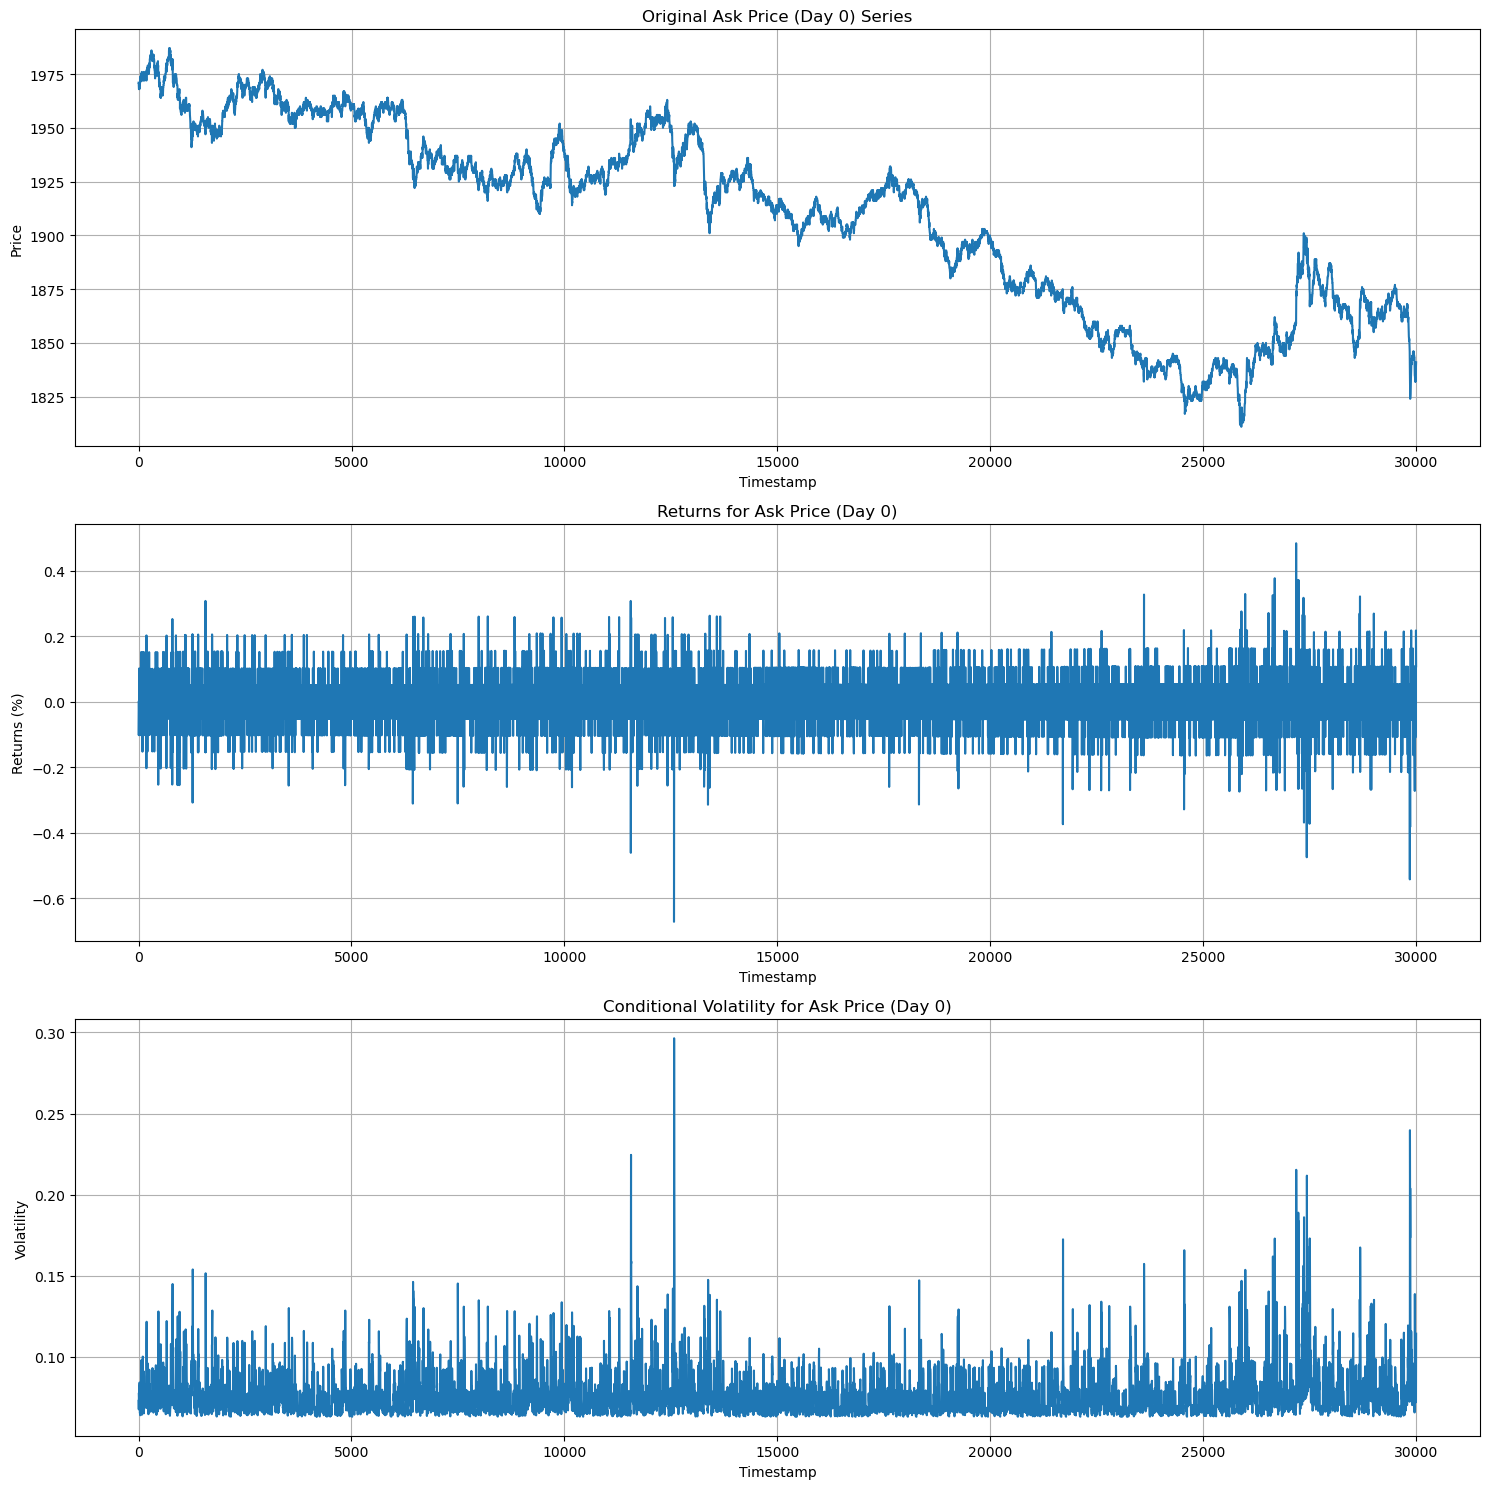

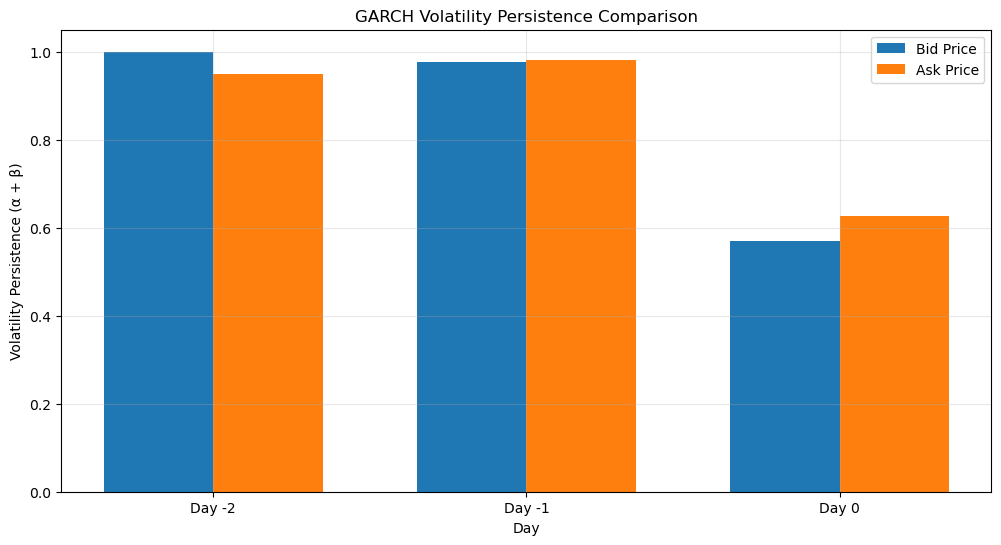

In [35]:
# Fit GARCH model to bid_price_1 and ask_price_1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Function to fit GARCH model and plot results
def fit_garch_model(series, title):
    # Calculate returns (percentage change)
    returns = 100 * series.pct_change().dropna()
    
    # Fit GARCH(1,1) model
    model = arch_model(returns, vol='GARCH', p=1, q=1)
    results = model.fit(disp='off')
    
    # Print model summary
    print(f"GARCH Model Summary for {title}")
    print(results.summary())
    
    # Plot the original series, returns, and conditional volatility
    fig, axes = plt.subplots(3, 1, figsize=(15, 15))
    
    # Original price series
    axes[0].plot(series.index, series.values)
    axes[0].set_title(f'Original {title} Series')
    axes[0].set_xlabel('Timestamp')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    
    # Returns
    axes[1].plot(returns.index, returns.values)
    axes[1].set_title(f'Returns for {title}')
    axes[1].set_xlabel('Timestamp')
    axes[1].set_ylabel('Returns (%)')
    axes[1].grid(True)
    
    # Conditional volatility
    conditional_vol = results.conditional_volatility
    axes[2].plot(returns.index, conditional_vol)
    axes[2].set_title(f'Conditional Volatility for {title}')
    axes[2].set_xlabel('Timestamp')
    axes[2].set_ylabel('Volatility')
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return results

# Fit GARCH models for each day's bid and ask prices
print("Fitting GARCH models for Day -2")
bid_garch_day_m2 = fit_garch_model(prices_day__2['bid_price_1'], 'Bid Price (Day -2)')
ask_garch_day_m2 = fit_garch_model(prices_day__2['ask_price_1'], 'Ask Price (Day -2)')

print("Fitting GARCH models for Day -1")
bid_garch_day_m1 = fit_garch_model(prices_day__1['bid_price_1'], 'Bid Price (Day -1)')
ask_garch_day_m1 = fit_garch_model(prices_day__1['ask_price_1'], 'Ask Price (Day -1)')

print("Fitting GARCH models for Day 0")
bid_garch_day_0 = fit_garch_model(prices_day_0['bid_price_1'], 'Bid Price (Day 0)')
ask_garch_day_0 = fit_garch_model(prices_day_0['ask_price_1'], 'Ask Price (Day 0)')

# Compare volatility persistence across days
days = ['Day -2', 'Day -1', 'Day 0']
bid_models = [bid_garch_day_m2, bid_garch_day_m1, bid_garch_day_0]
ask_models = [ask_garch_day_m2, ask_garch_day_m1, ask_garch_day_0]

# Extract GARCH parameters
bid_persistence = [model.params['alpha[1]'] + model.params['beta[1]'] for model in bid_models]
ask_persistence = [model.params['alpha[1]'] + model.params['beta[1]'] for model in ask_models]

# Plot volatility persistence comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(days))
width = 0.35

plt.bar(x - width/2, bid_persistence, width, label='Bid Price')
plt.bar(x + width/2, ask_persistence, width, label='Ask Price')

plt.xlabel('Day')
plt.ylabel('Volatility Persistence (α + β)')
plt.title('GARCH Volatility Persistence Comparison')
plt.xticks(x, days)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Spread distribution:

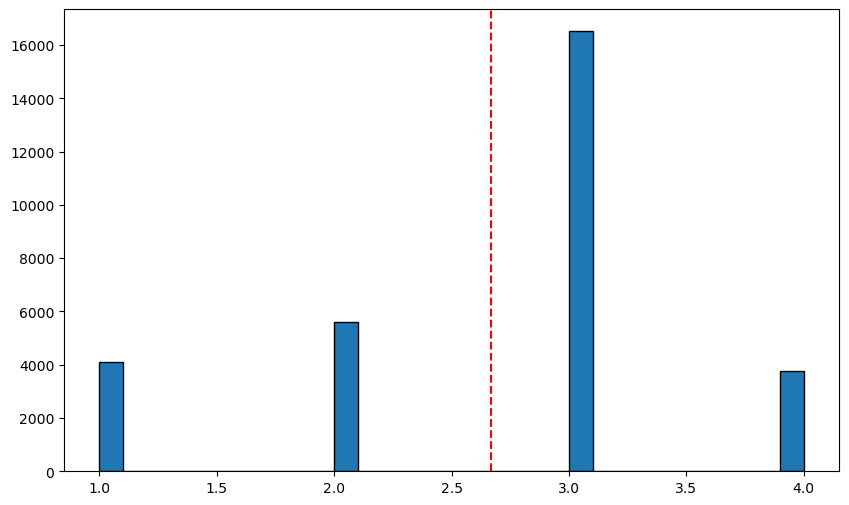

In [36]:
spread_total = all_prices['ask_price_1'] - all_prices['bid_price_1']
spreads = np.array(spread_total)
mean_spread = np.mean(spreads)
std_spread = np.std(spreads)

plt.figure(figsize=(10, 6))
plt.hist(spreads, bins=30, edgecolor='black')
plt.axvline(mean_spread, color='red', linestyle='--', label='Mean Spread')



In [37]:
# Frequency of each spread value (e.g., in ticks)
values, counts = np.unique(spreads, return_counts=True)
for val, cnt in zip(values, counts):
    print(f"Spread={val:.2f}: count={cnt} ({cnt/len(spreads)*100:.1f}%)")

Spread=1.00: count=4110 (13.7%)
Spread=2.00: count=5590 (18.6%)
Spread=3.00: count=16518 (55.1%)
Spread=4.00: count=3782 (12.6%)


In [38]:
from scipy import stats
# Split spreads into two halves of the day
n = len(spreads)//2
morning_spreads = spreads[:n]; afternoon_spreads = spreads[n:]
tstat, pval = stats.ttest_ind(morning_spreads, afternoon_spreads, equal_var=False)
print("Spread difference (morning vs afternoon): p-value =", pval)


Spread difference (morning vs afternoon): p-value = 9.518157587006485e-11


# Returns

In [44]:
for i in range(1,10):
    return_mid_prices =  all_prices['mid_price'].pct_change().dropna()
    autocorr1 = return_mid_prices.autocorr(lag=i)
    print(f"Autocorrelation at lag {i}:", autocorr1)
    #Statistical significance of autocorrelation
    from statsmodels.stats.stattools import jarque_bera
    jb_stat, p_value, _, _ = jarque_bera(return_mid_prices)
    print(f"Jarque-Bera test statistic: {jb_stat:.4f}")
    print(f"p-value: {p_value:.4f}")




Autocorrelation at lag 1: -0.1781053851740725
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 2: -0.02961091590122043
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 3: 0.031100041184719603
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 4: -0.011514216934967679
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 5: 0.014191484318276498
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 6: -0.01137305031143958
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 7: -0.00873004177822865
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 8: -0.0021329007154525753
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000
Autocorrelation at lag 9: 0.015483681084853356
Jarque-Bera test statistic: 390638243.3977
p-value: 0.0000


In [41]:
n = len(return_mid_prices)
t_stat = autocorr1 * np.sqrt(n) / np.sqrt(1/(1-autocorr1**2))
print("t-stat for autocorrelation:", t_stat)

t-stat for autocorrelation: -30.35502381770872


In [42]:
import statsmodels.api as sm
X = return_mid_prices[:-1].values; y = return_mid_prices[1:].values
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())  # check coefficient of lagged return


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     982.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.78e-212
Time:                        14:11:11   Log-Likelihood:             1.6790e+05
No. Observations:               29998   AIC:                        -3.358e+05
Df Residuals:                   29996   BIC:                        -3.358e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.799e-06   5.18e-06     -0.540      0.5

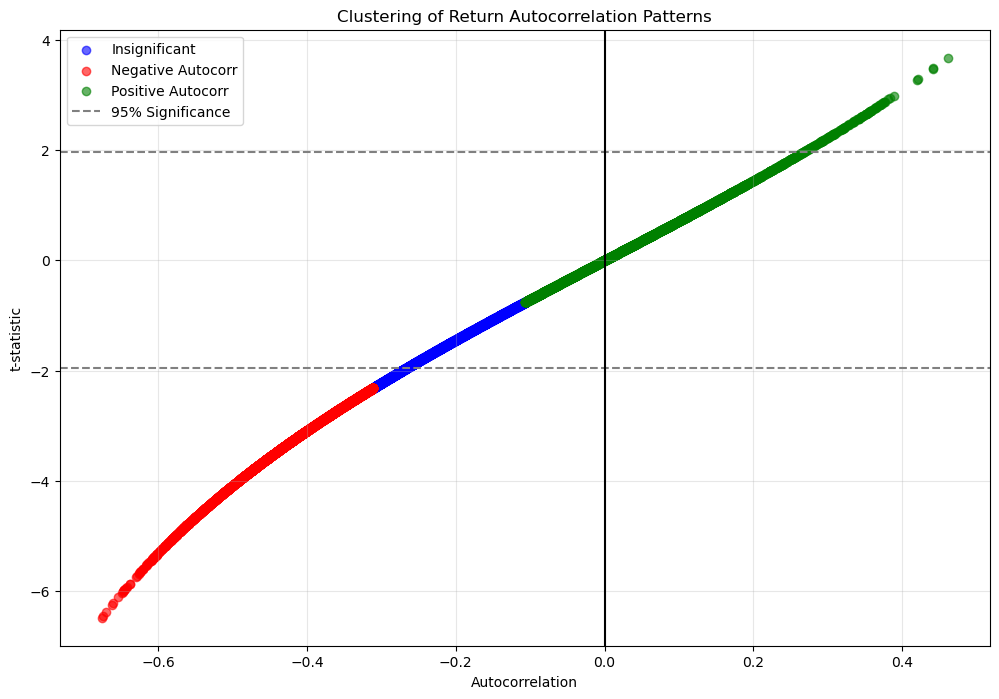


Summary of Autocorrelation Clusters:

Insignificant Cluster:
  Number of periods: 14030
  Average autocorrelation: -0.2144
  Average t-statistic: -1.5606

Negative Autocorr Cluster:
  Number of periods: 9443
  Average autocorrelation: -0.3945
  Average t-statistic: -3.0669

Positive Autocorr Cluster:
  Number of periods: 6477
  Average autocorrelation: 0.0068
  Average t-statistic: 0.0529


In [45]:
# Cluster data based on autocorrelation patterns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate rolling autocorrelation
window_size = 50  # Adjust window size as needed
rolling_autocorr = return_mid_prices.rolling(window=window_size).apply(
    lambda x: pd.Series(x).autocorr(lag=1), raw=True
)

# Create features for clustering
# We'll use the autocorrelation value and its statistical significance
rolling_std = return_mid_prices.rolling(window=window_size).std()
significance = rolling_autocorr * np.sqrt(window_size) / np.sqrt(1 - rolling_autocorr**2)

# Prepare data for clustering
cluster_data = pd.DataFrame({
    'autocorr': rolling_autocorr,
    'significance': significance
}).dropna()

# Define clusters
X_cluster = cluster_data.values
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: positive, negative, and insignificant
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to the data
cluster_data['cluster'] = cluster_labels

# Identify the clusters (positive autocorr, negative autocorr, insignificant)
cluster_centers = kmeans.cluster_centers_
pos_cluster = np.argmax(cluster_centers[:, 0])  # Cluster with highest autocorr
neg_cluster = np.argmin(cluster_centers[:, 0])  # Cluster with lowest autocorr

# Plot the clusters
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green']
labels = ['Insignificant', 'Negative Autocorr', 'Positive Autocorr']

# Reassign labels for clarity
actual_labels = np.zeros_like(cluster_labels)
actual_labels[cluster_labels == pos_cluster] = 2  # Positive autocorr
actual_labels[cluster_labels == neg_cluster] = 1  # Negative autocorr
# The rest remain as 0 (insignificant)

# Plot each cluster
for i in range(3):
    mask = actual_labels == i
    plt.scatter(
        cluster_data['autocorr'][mask], 
        cluster_data['significance'][mask],
        c=colors[i], 
        label=labels[i], 
        alpha=0.6
    )

plt.axhline(y=1.96, color='gray', linestyle='--', label='95% Significance')
plt.axhline(y=-1.96, color='gray', linestyle='--')
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel('Autocorrelation')
plt.ylabel('t-statistic')
plt.title('Clustering of Return Autocorrelation Patterns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics for each cluster
print("\nSummary of Autocorrelation Clusters:")
for i, label in enumerate(labels):
    mask = actual_labels == i
    if sum(mask) > 0:
        print(f"\n{label} Cluster:")
        print(f"  Number of periods: {sum(mask)}")
        print(f"  Average autocorrelation: {cluster_data['autocorr'][mask].mean():.4f}")
        print(f"  Average t-statistic: {cluster_data['significance'][mask].mean():.4f}")
